# SLU16 - Workflow: Exercise Notebook

In [17]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from hashlib import sha1 # just for grading purposes
import json # just for grading purposes

from utils import workflow_steps, data_analysis_steps
from utils import get_dataset
from utils import plot_confusion_matrix

def _hash(obj, salt='none'):
    if type(obj) is not str:
        obj = json.dumps(obj)
    to_encode = obj + salt
    return sha1(to_encode.encode()).hexdigest()
import warnings
warnings.filterwarnings('ignore')

In this notebook we will be covering the following:

* **1. Workflow**
 * Step 1: Get the data
 * Step 2: Data analysis and preparation
   * Step 2.1 Data analysis
   * Step 2.2 Dealing with data problems
   * Step 2.3 Feature engineering
   * Step 2.4 Feature selection
 * Step 3: Model training
 * Step 4: Evaluate results
* **2. Pipelines and Custom Objects**
    * Step 2.1: Pipelines 
        * Step 2.1.1: Doing it "the hard way"
        * Step 2.1.2: What is a pipeline
        * Step 2.1.3: Setting up a pipeline
    * Step 2.2: Custom Objects
        * Step 2.2.1: Custom Transformers
        * Step 2.2.2: Custom Estimators

<div class="alert alert-info">
    A <b>data science workflow</b> defines the phases (or steps) in a data science project. Using a well-defined data science workflow is useful not only to you, but your teammates as it provides a simple way to clearly structure and organize a data science project. Across this specialization we've been covering the different steps in this workflow, but how well are you familiarised with them?
</div>

## Exercise 1: Workflow

### Exercise 1.1 - Overall workflow steps

What are the basic workflow steps?

You probably know them already, but we want you to really internalize them. We've given you a list of steps in `workflow_steps`, but it appears that, not only does it have too many steps, some are _probably_ wrong, as well.

Select the correct ones and reorder them!

In [18]:
print("Workflow steps:")
for i in range(len(workflow_steps)):
    print(i+1, ': ', workflow_steps[i])

Workflow steps:
1 :  Watch Netflix
2 :  Get the data
3 :  Establish a Baseline
4 :  Spam
5 :  Increase complexity
6 :  Data analysis and preparation
7 :  Evaluate results
8 :  Google Hackathon solutions
9 :  Iterate
10 :  Train model


In [19]:
# Exercise 1.1. Filter and sort the names of the steps in the workflow_steps list
# workflow_steps_answer = [...]

# YOUR CODE HERE
workflow_steps_answer = ["Get the data", "Data analysis and preparation", "Train model", "Evaluate results","Iterate"]

In [20]:
assert _hash(len(workflow_steps_answer), 'salt0') == '253bd16d7f97f7d7295d404825e32985d257e11f', "your workflow size doesn't look right! Don't forget to remove steps that shouldn't be there"
assert _hash([step.lower() for step in workflow_steps_answer], 'salt0') == '701e2306da9bfde36382bdb6feb80a354916ebf4', "your workflow order doesn't look right! Some steps might be out of place"


## Exercise 1.2: Data Analysis and Preparation

There are way too many substeps in the **Data Analysis and Preparation** step to group them all under a single category. We've given you another list of steps: `data_analysis_steps`.

Aside from being shuffled, it should be fine but keep an eye out. You never know what to expect...

In [21]:
print("Data Analysis and Preparation steps:")
for i in range(len(data_analysis_steps)):
    print(i+1, ': ', data_analysis_steps[i])

Data Analysis and Preparation steps:
1 :  Dealing with data problems
2 :  Data analysis
3 :  Spanish Inquisition
4 :  Feature engineering
5 :  Feature selection


In [22]:
# Exercise 1.2. Filter and sort the names of the steps in the data_analysis_steps list
# data_analysis_steps_answer = [...]

# YOUR CODE HERE
data_analysis_steps_answer = ["Data analysis","Dealing with data problems","Feature engineering", "Feature selection"]

In [23]:
assert _hash(len(data_analysis_steps_answer), 'salt0') == '3aa298b947129ff226ba1e3f545f8b5ffaa6e557', "your workflow size doesn't look right! Don't forget to remove steps that shouldn't be there"
assert _hash([step.lower() for step in data_analysis_steps_answer], 'salt0') == '658ab90eff4a0cea2bfb51cc89c8db5b4121fa86', "your workflow order doesn't look right! Some steps might be out of place"


<img src="media/spanish_inquisition.gif" width="400" />

## Exercise 2 - Walking down the yellow (workflow) path

There is no template for solving a data science problem. The roadmap changes with every new dataset and new problem. But we do see similar steps in many different projects. Regardless, some steps are fairly common in any process. Let's go through them one by one.

### Exercise 2.1 - Objective

Every DS analysis should start with one question: **What is the problem you are trying to solve?** Clearly stating your problem is the first step to solving it and without a clear problem, you could find yourself down a data-science rabbit-hole.

For this workflow, we are going to analyze a **a randomly generated dataset**. The objective? 

<div class="alert alert-info">
    Build a model to predict the <b>value of y</b> given a set of features.
</div>

#### Exercise 2.1.1 - Objective
Let's start by importing the dataset

In [24]:
df, y = get_dataset()  # preloaded dataset
df['y'] = y
df.head()


,17,leg_1,7,arm_2,2,11,4,16,0,14,...,10,15,9,19,18,8,6,arm_0,1,y
0,-0.334501,lee,-0.653329,Betsey,-0.474945,2.143944,0.504987,-0.792521,NaN,0.633919,...,-0.071335,0.087142,-0.661786,-1.200296,0.865755,0.186454,0.404982,tribesman,0.029102,0
1,1.375707,Runge,0.125576,bottleneck,-0.150056,0.321357,NaN,1.189470,1.613711,0.421921,...,-1.158068,0.963360,-0.244157,-0.297564,0.701173,0.453534,0.015579,sloven,0.659924,0
2,1.189017,Hackett,-0.570746,neuropsychiatric,1.420504,-1.122722,-0.623141,-0.637740,NaN,0.382410,...,-0.270624,-1.692005,0.289169,-0.637387,-0.555477,0.492451,0.471416,Shakespearian,0.950573,1
3,-0.689188,woodchuck,0.197911,systematic,1.735964,0.059630,1.317394,1.049553,0.698223,-0.646937,...,0.852392,-1.106450,0.895193,2.075261,0.197600,0.393485,-0.483886,semper,-0.320670,1
4,-0.968344,inkling,-1.334025,kingpin,0.105376,-0.988591,-0.982487,-0.989628,0.179894,-1.103589,...,-0.348985,1.303736,0.918317,0.550052,-0.224633,1.392002,0.319782,compensable,-0.222100,0


<div class="alert alert-warning">
⚠️ Is the objective clear to you?
This is just a yes or no question, no need for code here! :P 
</div>

In [25]:
#answer_2_1_1=False
# YOUR CODE HERE
answer_2_1_1=True

In [26]:
assert answer_2_1_1, "Don't make the panda sad!"

#### Exercise 2.1.2 - Clasifying the problem
Now that we have our data imported into Pandas and we've checked out the first few rows of our dataframe, there's a few questions we need to answer before we move on:

- *A*: Is this **supervised learning** or **unsupervised learning**? 
- *B*: Is this a **classification problem** or is it a **regression problem**? 
- *C*: Is this a **prediction problem** or an **inference problem**?

Keeping our **objective in mind** how would you classify this problem?

In our example, we are going to be using **regression** to **predict** value y from the set of features.

Save, in `answer_2_1_2`, the value from **A, B and C** that apply to our problem!

In [27]:
# Remove from the string what doesn't apply to our problem (including the '/')
#answer_2_1_2 = ["supervised/unsupervised learning","classification/regression problem", "prediction/inference problem"]
# YOUR CODE HERE
answer_2_1_2 = ["supervised learning","classification problem", "prediction problem"]


In [28]:
assert _hash(len(answer_2_1_2), 'salt0') == 'bb6591f296df2e5dd0324184f4348795b760f11d', "your answer doesn't have the correct size. I've asked you to pick the correct option for three questions"
assert _hash([step.lower() for step in answer_2_1_2], 'salt0') == 'd5cf73be53ec62d0d1ca23376f66f5a30cce8f67', "One or more of your answers is incorrect."

### Exercise 2.2 - Data Exploration and Data Cleaning

Back to our data! Let’s determine which variable is our target and which features we think are important.
Our target is going to be the column titled **y** and our features are going to be the columns not containing the words **arm** or **leg** (assume we got this information from our boss or client). Remove all of the columns we don’t need for this analysis. Order the columns lexicographically.

<div class="alert alert-warning"> 
⚠️ <b>NOTE: </b>lexicographic sorting means basically that the language treats the variables as strings and compares character by character ("200" is greater than "19999" because '2' is greater than '1').
</div>
    
Save the resulting dataframe in `df_clean`. 

Remember, in this case we're telling you what columns are to be kept, but this is something that is part of your workflow process. **A good data exploration and data cleaning is a key factor in the outcome of your model!**

In [31]:
#df_clean = ...
# YOUR CODE HERE
columns_to_remove = [col for col in df.columns if 'arm' in col or 'leg' in col]
df_clean = df.drop(columns=columns_to_remove)

# Order the columns lexicographically
df_clean = df_clean.reindex(sorted(df_clean.columns), axis=1)

In [32]:
assert isinstance(df_clean, pd.DataFrame), "Should be a dataframe"
assert df_clean.shape == (100, 21), "The shape of the dataframe is different than expected. Have you dropped the uncessessary columns?"
assert _hash([step.lower() for step in df_clean.columns], 'salt0') == '64d0d2fe9259036f208c2ef818f158ee866a1968', "One or more of your column headers is incorrect."


### Exercise 2.3 - EDA

Exploratory data analysis (EDA) gives the data scientist an opportunity to really learn about the data they are working with. 

Throughout the EDA process, I clean the data. Data from the real world is *very messy*. As I work through the EDA process and learn about the data, I take notes on things I need to fix in order to conduct my analysis. Most times, **Data cleaning and EDA go hand in hand for me**.

The first things I check are data types. Getting all of the values in the correct format is important. This can involve stripping characters from strings, converting integers to floats, or many other things.

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87 non-null     float64
 1   1       100 non-null    float64
 2   10      100 non-null    float64
 3   11      100 non-null    float64
 4   12      86 non-null     float64
 5   13      100 non-null    float64
 6   14      86 non-null     float64
 7   15      100 non-null    float64
 8   16      100 non-null    float64
 9   17      100 non-null    float64
 10  18      100 non-null    float64
 11  19      100 non-null    float64
 12  2       100 non-null    float64
 13  3       100 non-null    float64
 14  4       88 non-null     float64
 15  5       86 non-null     float64
 16  6       100 non-null    float64
 17  7       100 non-null    float64
 18  8       100 non-null    float64
 19  9       100 non-null    float64
 20  y       100 non-null    int64  
dtypes: float64(20), int64(1)
memory usage: 1

What type of variables are our features? 

In [34]:
#answer_2_3 = ...
# YOUR CODE HERE
answer_2_3 = 'float64'

In [35]:
assert _hash(answer_2_3, 'salt0') == '70d410ba8247cfc821d4442f5ad0b48d983138e0', "Data type is incorrect."

### Exercise 2.4 - Impute missing values
Finding missing values is quite common. Just replace them in our clean dataframe with the mean of the corresponding column/feature.

In [59]:
#df_clean = ...
# YOUR CODE HERE
imputer = SimpleImputer(strategy='mean')
# Fit the imputer to your data and transform it
df_clean = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)


In [60]:
assert isinstance(df_clean, pd.DataFrame), "Should be a dataframe"
assert df_clean.isna().sum().sum() == 0, "Missing values are still present"
assert df_clean.shape == (100, 21), "The shape of the dataframe is different than expected. Have you dropped the rows with missing data?"
assert math.isclose(df_clean.values.sum(), 127.511, abs_tol=0.01), "Are you repleacing the missing values by the mean of each column?" 

Uff! That took quite some time, but now we have a clean and tidy dataframe to work with!

## Exercise 3 - Baseline modeling

As a data scientist, you will build a lot of models. You will use a variety of algorithms to perform a wide variety of tasks. You will need to use intuition and experience to decide when certain models are appropriate! 

But when constructing your baseline model, the simpler, the better! 

Let's start!

### Exercise 3.1 - Separate your target value 

Separate into `X` and `y` your features and your target. Order the columns in `X` as in exercise 2.2. 

In [42]:
df_clean

,0,1,10,11,12,13,14,15,16,17,...,19,2,3,4,5,6,7,8,9,y
0,0.285991,0.029102,-0.071335,2.143944,1.765454,0.852433,0.633919,0.087142,-0.792521,-0.334501,...,-1.200296,-0.474945,-0.114736,0.504987,0.088962,0.404982,-0.653329,0.186454,-0.661786,0.0
1,1.613711,0.659924,-1.158068,0.321357,-0.173072,0.964087,0.421921,0.963360,1.189470,1.375707,...,-0.297564,-0.150056,-1.227608,-0.012186,0.865620,0.015579,0.125576,0.453534,-0.244157,0.0
2,0.285991,0.950573,-0.270624,-1.122722,-0.832356,2.455300,0.382410,-1.692005,-0.637740,1.189017,...,-0.637387,1.420504,-0.530997,-0.623141,-2.255540,0.471416,-0.570746,0.492451,0.289169,1.0
3,0.698223,-0.320670,0.852392,0.059630,-0.651418,0.635172,-0.646937,-1.106450,1.049553,-0.689188,...,2.075261,1.735964,-0.535235,1.317394,-1.146581,-0.483886,0.197911,0.393485,0.895193,1.0
4,0.179894,-0.222100,-0.348985,-0.988591,-0.601368,-1.570501,-1.103589,1.303736,-0.989628,-0.968344,...,0.550052,0.105376,0.940771,-0.982487,1.560103,0.319782,-1.334025,1.392002,0.918317,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.534114,1.431401,-1.217220,0.711615,0.645376,-0.748487,-1.124642,-0.763516,1.551152,1.755341,...,2.060748,-0.248964,0.115675,1.179297,-0.071726,1.368632,0.971571,1.277677,0.332314,0.0
96,-0.220964,-0.545612,1.039670,1.503398,1.399355,-2.041735,0.877362,-0.977637,-0.247177,0.640843,...,1.797687,-0.571179,-0.681984,-1.001620,-0.921694,0.924634,0.572583,0.026886,0.208383,1.0
97,-0.039555,-1.604993,1.985223,-1.081057,1.255756,0.029756,1.053153,-0.511036,0.938284,-0.309172,...,-0.434496,0.222134,-0.516045,0.096121,-0.021852,-0.894607,-0.478749,0.681501,0.028318,1.0
98,1.085896,1.203166,-1.648321,0.028181,0.056650,0.817766,-0.009119,0.735948,1.390208,-0.305225,...,-1.065114,-0.609512,0.557810,0.010353,0.417673,0.529693,-0.186971,0.474698,-0.025027,0.0


In [61]:
#X = ...
#y = ...

# YOUR CODE HERE
# Separate the target variable 'y'
y = df_clean['y'].astype('int64')

# Drop the target column from the dataset to get the features
X = df_clean.drop('y', axis=1)

# Order the columns of X lexicographically
X = X.reindex(sorted(X.columns), axis=1)

In [62]:
y

0     0
1     0
2     1
3     1
4     0
     ..
95    0
96    1
97    1
98    0
99    0
Name: y, Length: 100, dtype: int64

In [63]:
assert _hash(list(y), 'salt0') == '917a4dd4b91497ba8c83f4d64b5d27642af0ce4f', "Have you picked the right column as the target?"
assert X.shape == (100, 20), "The shape of the dataframe is different than expected. Have you dropped the target?"
assert _hash(sorted(X.columns), 'salt0') == 'df65a7cdfbc4e774e8e18dbc46c7faeb42dc4c27', "Have you included the right columns in X?"

### Exercise 3.2 - Split data

Split your dataset into test and train data, using `test_size=0.2` and `random_state=42` on your `train_test_split()`

In [64]:
#X_train, X_test, y_train, y_test = ...
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
assert (X_train.shape, X_test.shape, y_train.shape, y_test.shape) == ((80, 20), (20, 20), (80,), (20,)), "have you split the data correctly? Test size should be 0.2"

### Exercise 3.3 - Scale your data
As we are not sure whether the features units of measures are in the same scale, you should scale your X_train and X_test dataframes separately. Use `MinMaxScaler`.

In [66]:
# scaler = ...
# X_train_scaled = ...
# X_test_scaled = ...

# YOUR CODE HERE
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [67]:
assert math.isclose(sum(X_train_scaled[:,1]), 42.14, abs_tol=0.01), "have you used the correct scaler?"
assert math.isclose(sum(X_test_scaled[:,4]), 13.56, abs_tol=0.01), "have you used the correct scaler?"


### Exercise 3.4 - Finally! The model!

We can finally make our predictions with a simple Random Forest Classifier!

In [68]:
#rf = RandomForestClassifier()
#model = rf.fit(..., ... )
#predictions = rf.predict(...)
# YOUR CODE HERE
# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model to the scaled training data
model = rf.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = model.predict(X_test_scaled)

# Now 'predictions' contains the predicted labels for the test set

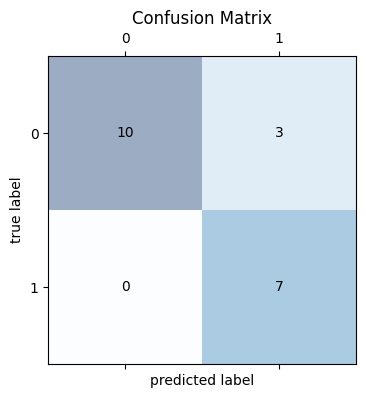

Accuracy score: 0.85


In [69]:
assert predictions.size == 20
plot_confusion_matrix(y_test, predictions)

print ('Accuracy score:', accuracy_score(y_test, predictions)) 

Our model is not performing bad at all! If you want to improve it, you should make **small alterations**, **one at a time**! Keeping track of your changes is crucial to know exactly what change is helping or hurting your model! 

## Exercise 4 - Pipelines!!!!! 

We've already loaded and splitted a dataset for the following exercises. They're stored in the `new_X_train`, `new_X_test`, `new_y_train` and `new_y_test` variables.

In a perfect world, where you have all your data clean and ready-to-go, you can create your pipeline with just Scikit-learn's Transformers. However, in the real world, that's not the case, and you'll need to create custom Transformers to get the job done. Take a look at the data set, what do you see?

In [72]:
new_X, new_y = get_dataset()  # preloaded dataset
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.33)

In [ ]:
# use this cell to explore the data
# do you notice something interesting in the data?

As you can see, it's the exact same dataset from the previous exercises! The same issues have returned:

- There are 4 columns whose name starts with either arm or leg which are all filled with gibberish.
- There are some missing values in some columns.

So, first things first, let's get rid of those columns with gibberish through a **Custom Transformer**, so we can plug it in a Scikit Pipeline after.

### Exercise 4.1 - Custom Transformer

In [73]:
# Create a pipeline step called RemoveLimbs that removes any
# column whose name starts with the string 'arm' or ´leg´

# YOUR CODE HERE
class RemoveLimbs(TransformerMixin):
    def fit(self, X, y=None):
        # Nothing to fit, so just return self
        return self

    def transform(self, X):
        # Remove columns starting with 'arm' or 'leg'
        columns_to_remove = [col for col in X.columns if col.startswith('arm') or col.startswith('leg')]
        return X.drop(columns=columns_to_remove)

In [74]:
assert issubclass(RemoveLimbs, TransformerMixin)
assert _hash(sorted(RemoveLimbs().fit_transform(new_X).columns), 'salt5') == '71443dfc3077d773d4c74e958dadf91dc2cc148a'
assert _hash(list(map(lambda col: col.startswith('arm') or col.startswith('leg'), RemoveLimbs().fit_transform(new_X_train).columns)), 'salt6') == 'ce45cf3759d2210f2d1315f1673b18f34e3ac711'

### Exercise 4.2 - Pipelines are the best!

Now that we have our Custom Transformer in place, we can design our pipeline! 

Create a pipeline with the following steps:

1. Removes limbs columns
2. Imputes missing values with the mean
3. Has a Random Forest Classifier as the last step

You may use `make_pipeline` to create your pipeline with as many steps as you want as long as the first two are the Custom Transformer you developed previously, a `SimpleImputer` as the second step, and a `RandomForestClassifier` as the last step. Save your pipeline into a variable named `pipeline`!

In [75]:
# pipeline = make_pipeline(...)
# YOUR CODE HERE

pipeline = make_pipeline(
    RemoveLimbs(),                          # Step 1: Custom Transformer to remove 'arm' and 'leg' columns
    SimpleImputer(strategy='mean'),        # Step 2: Impute missing values with the mean
    RandomForestClassifier()               # Step 3: RandomForestClassifier
)


In [76]:
assert _hash(pipeline.steps[0][0], 'salt7') == '471b02068ac2c4f479c2e9f85f4b3dc2179bb841'
assert _hash(pipeline.steps[1][0], 'salt8') == 'ca83eaea1a7e243fa5574cfa6f52831166ee0f32'
assert _hash(pipeline.steps[-1][0], 'salt9') == '0d66ba4309ad4939673169e74f87088dcadd510b'

Does it work? Let's check it out on our dataset!

In [77]:
pipeline.fit(new_X_train, new_y_train)
new_y_pred = pipeline.predict(new_X_test)
accuracy_score(new_y_test, new_y_pred)

0.9090909090909091

It doesn't get much simpler that this, does it?

For an extra challenge, go back to exercises 2 and 3 and follow our workflow but with a Pipeline! For each special processing we've done, you can create a custom transformer for that column! 

Dominating pipelines and custom transformers can be a huge time saver! And there's the hackathon ahead...

**Good luck!**